In [56]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import operator
from sklearn import cluster
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud

In [57]:
df = pd.read_csv('news_headlines.csv')
uw_df = pd.read_csv('useless_words.csv')

In [58]:
print(len(df))
df = df[(df['publish_date'])//10000 == 2005]
print(len(df))

1000001
66320


In [59]:
def represents_number(s):
    for c in '0123456789':
        if s[0] == c:
            return True
    return False
    '''try:
        float(s)
        return True
    except ValueError:
        return False'''

def convert_word(s):
    # take out useless characters
    s = s.translate({ord(c): None for c in '!@#:;\'\"*)([]{}%.,&'})
    # plural
    if len(s) > 0 and s[len(s)-1] == 's':
        s = s[:-1]
    return s

In [60]:
useless_words = set(uw_df.useless_words.values.tolist())

headlines = []

bag_of_words = {}
for i, headline in enumerate(df.headline_text):
    if i%(len(df.headline_text)//10) == 0:
        print(i,end=' ')
    if len(headlines)==0 or len(headlines[-1])!=0:
        headlines.append([])
    for word in headline.split(' '):
        word = convert_word(word)
        if (len(word) == 0):
            continue
        # useless words
        if (word in useless_words):
            continue
        # money
        if (word[0] == '$'):
            continue
        # number
        if (represents_number(word)):
            continue
        
        if (word in bag_of_words):
            bag_of_words[word] += 1
        else:
            bag_of_words[word] = 1
            
        if (word not in headlines[-1]):
            headlines[-1].append(word)
        #print(headlines)


0 6632 13264 19896 26528 33160 39792 46424 53056 59688 

In [61]:
print(len(bag_of_words))

16137


In [62]:
sorted_dict = sorted(bag_of_words.items(), key=operator.itemgetter(1))[-2000:]
print(sorted_dict)

[('using', 34), ('oval', 34), ('sport', 34), ('dive', 34), ('pest', 34), ('venu', 34), ('marketing', 34), ('livestock', 34), ('duck', 34), ('sunshine', 34), ('self', 34), ('lodge', 34), ('plot', 34), ('blackout', 34), ('done', 34), ('mull', 34), ('pga', 34), ('turkey', 34), ('unveiled', 34), ('calm', 34), ('adjourned', 34), ('restaurant', 34), ('website', 34), ('johnson', 34), ('snowy', 34), ('golden', 34), ('sorenstam', 34), ('co', 34), ('webb', 34), ('hiddink', 34), ('bullying', 34), ('inflation', 34), ('expecting', 34), ('advocate', 34), ('freedom', 34), ('cricketer', 34), ('speculation', 34), ('rush', 34), ('bandit', 34), ('medal', 34), ('employer', 34), ('cruelty', 34), ('cool', 34), ('surplu', 34), ('disabled', 34), ('position', 34), ('priority', 34), ('try', 34), ('hammer', 34), ('bite', 34), ('earth', 34), ('dismissal', 34), ('dutch', 34), ('let', 34), ('unrest', 34), ('propose', 34), ('donor', 34), ('today', 34), ('declared', 34), ('roadwork', 34), ('wound', 34), ('ireland', 3

In [63]:
indexes = {sorted_dict[i][0]:i for i in range(0,len(sorted_dict))}
matrix = np.zeros((len(df.headline_text),len(indexes)),dtype=np.uint8)

for i in range(0,len(headlines)):
    for word in (j for j in headlines[i] if j in indexes):
        matrix[i,indexes[word]] = 1 if word in indexes else 0



In [64]:
np.random.shuffle(matrix)
matrix = matrix[:5000,:]

labels = list(range(2,50))
inertias = []

for i in labels:
    print(i)
    kmeans = cluster.KMeans(i,verbose = 0)
    kmeans.fit(matrix)
    inertias.append(kmeans.inertia_)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


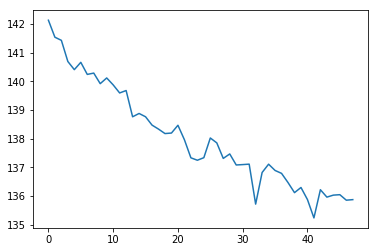

In [65]:
plt.plot(list(range(len(inertias))), [math.sqrt(i) for i in inertias])
plt.show()

In [66]:
kmeans = cluster.KMeans(25,verbose = 0)
kmeans.fit(matrix)
print(kmeans.labels_)

[20 20 20 ... 20 20 20]


In [67]:
print(kmeans.cluster_centers_.shape)
wordclouds = []
for cluster in kmeans.cluster_centers_:
    words = ""
    for i in range(len(cluster)):
        words += (sorted_dict[i][0] + ' ') * int(cluster[i]*100)
    #print(words)
    wordclouds.append(WordCloud(max_font_size=50, collocations=False).generate(words))


(25, 2000)


In [68]:
for i in range(len(wordclouds)):
    plt.figure(dpi=140)
    plt.imshow(wordclouds[i], interpolation="bilinear")
    plt.axis("off")
    plt.savefig(str(i))
    plt.close()